In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [4]:
corr_bmmcneurips_pearson = pd.read_csv("results/bmmcneurips/correlation_table_pearson.tsv", index_col=0)
corr_bmmcneurips_spearman = pd.read_csv("results/bmmcneurips/correlation_table_spearman.tsv", index_col=0)
corr_pbmc10x_spearman = pd.read_csv("results/pbmc10x/correlation_table_spearman.tsv", index_col=0)
corr_pbmc10x_pearson = pd.read_csv("results/pbmc10x/correlation_table_pearson.tsv", index_col=0)

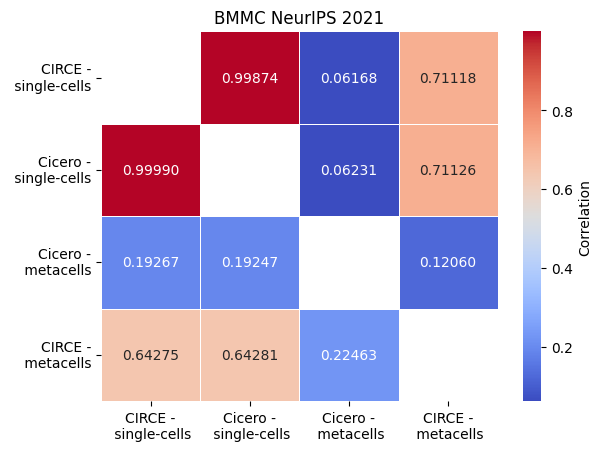

In [5]:
# Keep spearman and pearson on upper and lower triangle
corr_bmmcneurips_spearman = corr_bmmcneurips_spearman.where(np.triu(np.ones(corr_bmmcneurips_spearman.shape).astype(bool)))
corr_bmmcneurips_pearson = corr_bmmcneurips_pearson.where(np.tril(np.ones(corr_bmmcneurips_pearson.shape).astype(bool)))
corr_bmmcneurips = corr_bmmcneurips_pearson.fillna(corr_bmmcneurips_spearman)
corr_bmmcneurips.rename(
    index={
        "circe_singlecell": "CIRCE -\n single-cells",
        "circe_pseudocell": "CIRCE -\n metacells",
        "cicero_singlecell": "Cicero -\n single-cells",
        "cicero_pseudocell": "Cicero -\n metacells",},
    columns={
        "circe_singlecell": "CIRCE -\n single-cells",
        "circe_pseudocell": "CIRCE -\n metacells",
        "cicero_singlecell": "Cicero -\n single-cells",
        "cicero_pseudocell": "Cicero -\n metacells",
        }, inplace=True)
sb.heatmap(
    corr_bmmcneurips,  # Use ranked values for color mapping
    annot=corr_bmmcneurips,  # Annotate with the original values
    mask=np.eye(corr_bmmcneurips.shape[0]),  # Mask the diagonal
    fmt=".5f",  # Format for annotations
    cmap="coolwarm",  # Colormap
    cbar_kws={'label': 'Correlation'},  # Label for the color bar
    linewidths=0.5  # Grid lines
)

# Rotate the tick labels for better visibility
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.title("BMMC NeurIPS 2021")
plt.savefig("results/figures/correlation_heatmap_bmmcneurips.svg")

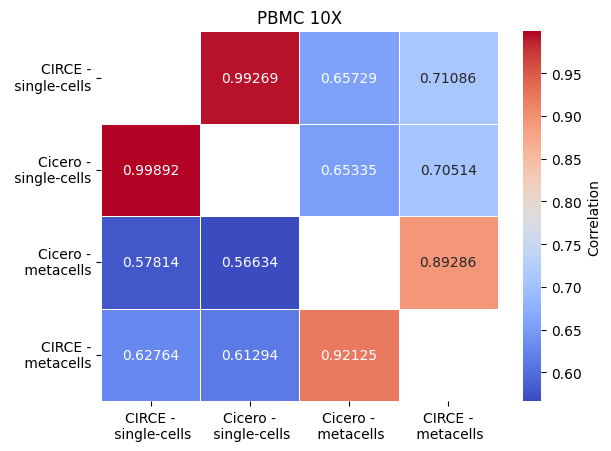

In [6]:
# Keep spearman and pearson on upper and lower triangles
corr_pbmc10x_spearman = corr_pbmc10x_spearman.where(np.triu(np.ones(corr_pbmc10x_spearman.shape).astype(bool)))
corr_pbmc10x_pearson = corr_pbmc10x_pearson.where(np.tril(np.ones(corr_pbmc10x_pearson.shape).astype(bool)))
corr_pbmc10x = corr_pbmc10x_pearson.fillna(corr_pbmc10x_spearman)

corr_pbmc10x.rename(
    index={
        "circe_singlecell": "CIRCE -\n single-cells",
        "circe_pseudocell": "CIRCE -\n metacells",
        "cicero_singlecell": "Cicero -\n single-cells",
        "cicero_pseudocell": "Cicero -\n metacells",},
    columns={
        "circe_singlecell": "CIRCE -\n single-cells",
        "circe_pseudocell": "CIRCE -\n metacells",
        "cicero_singlecell": "Cicero -\n single-cells",
        "cicero_pseudocell": "Cicero -\n metacells",
        }, inplace=True)

# Plot heatmap with ranks as colors but original values as annotations
sb.heatmap(
    corr_pbmc10x,  # Use ranked values for color mapping
    annot=corr_pbmc10x,  # Annotate with the original values
    mask=np.eye(corr_pbmc10x.shape[0]),  # Mask the diagonal
    fmt=".5f",  # Format for annotations
    cmap="coolwarm",  # Colormap
    cbar_kws={'label': 'Correlation'},  # Label for the color bar
    linewidths=0.5  # Grid lines
)

# Rotate the tick labels for better visibility
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.title("PBMC 10X")
plt.savefig("results/figures/correlation_heatmap_pbmc10x.svg")

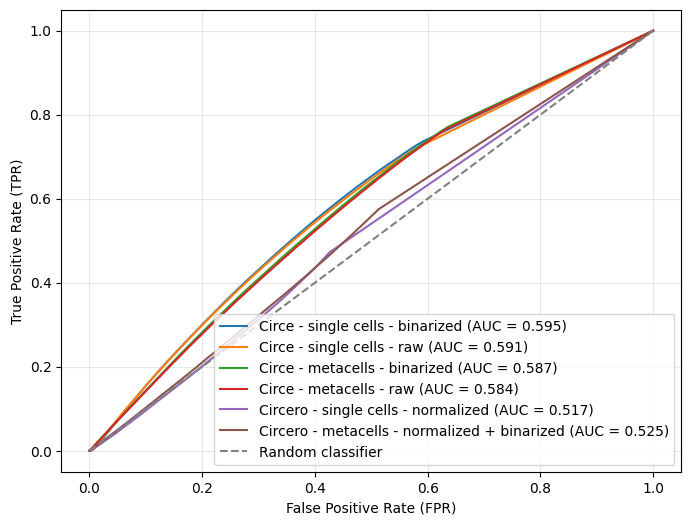

In [7]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))

roc_aucs = {}
paths = {
    "Circe - single cells - binarized": "results/pbmc10x/circe/circe_bin_singlecell_PCHiC_overlap.tsv",
    "Circe - single cells - raw": "results/pbmc10x/circe/circe_singlecell_PCHiC_overlap.tsv",
    "Circe - metacells - binarized": "results/pbmc10x/circe/circe_bin_pseudocell_PCHiC_overlap.tsv",
    "Circe - metacells - raw": "results/pbmc10x/circe/circe_pseudocell_PCHiC_overlap.tsv",
    "Circero - single cells - normalized": "results/pbmc10x/cicero/cicero_singlecell_PCHiC_overlap.tsv",
    "Circero - metacells - normalized + binarized": "results/pbmc10x/cicero/cicero_pseudocell_PCHiC_overlap.tsv",
}

for path in paths:

    pred = pd.read_csv(paths[path], sep="\t")
    # Compute FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(pred["score"], pred["name"].abs())

    # Compute AUC
    roc_auc = roc_auc_score(pred["score"], pred["name"].abs())
    roc_aucs = {path: roc_auc}


    plt.plot(fpr, tpr, label=f'{path} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.savefig("results/figures/roc_curve.svg")

In [8]:
bench = []

for dataset in ["pbmc10x", "bmmcneurips", ]:
    circe_bench = pd.read_csv("benchmark/{}/singlecell_circe_time.txt".format(dataset), sep="\t")
    circe_metacells_bench = pd.read_csv("benchmark/{}/pseudocell_circe_time.txt".format(dataset), sep="\t")

    monojob_circe_bench = pd.read_csv("benchmark/{}/monojob_singlecell_circe_time.txt".format(dataset), sep="\t")
    monojob_circe_metacells_bench = pd.read_csv("benchmark/{}/monojob_pseudocell_circe_time.txt".format(dataset), sep="\t")
    
    cicero_bench = pd.read_csv("benchmark/{}/singlecell_cicero_time.txt".format(dataset), sep="\t")
    cicero_metacells_bench = pd.read_csv("benchmark/{}/pseudocell_cicero_time.txt".format(dataset), sep="\t")

    bench.append(pd.concat([
        circe_bench, circe_metacells_bench, monojob_circe_bench,
        monojob_circe_metacells_bench, cicero_bench, cicero_metacells_bench
        ]).transpose().loc[["s", "max_rss", "cpu_time"], :])
    bench[-1].columns=['CIRCE (20 cpus)', 'CIRCE (20 cpus) - metacells', 'CIRCE (1 cpu)', 'CIRCE (1 cpu) - metacells', 'Cicero', 'Cicero - metacells']

# concatenate precising the dataset
bench = pd.concat(bench, keys=["pbmc10x", "bmmcneurips", ], axis=1)

In [9]:
bench = bench.stack(level=0)  # Move level 0 into rows

/local/scratch/tmp/ipykernel_3413189/3921744295.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  bench = bench.stack(level=0)  # Move level 0 into rows


In [10]:
bench

CIRCE (20 cpus) CIRCE (20 cpus) - metacells  \
s        bmmcneurips         73.0203                    117.2417   
         pbmc10x            202.8671                     625.582   
max_rss  bmmcneurips        13191.96                    16135.76   
         pbmc10x            27609.14                    43429.59   
cpu_time bmmcneurips          140.66                      391.97   
         pbmc10x               750.7                     1689.42   

                     CIRCE (1 cpu) CIRCE (1 cpu) - metacells       Cicero  \
s        bmmcneurips      151.0045                  243.9106     12679.21   
         pbmc10x          453.4941                 1809.8017  118051.2167   
max_rss  bmmcneurips        2012.5                   3863.91     21264.91   
         pbmc10x           16917.4                  68926.32    223114.52   
cpu_time bmmcneurips        108.85                    200.99     12593.95   
         pbmc10x            413.38                   1721.32     117423.2   

                     Cicero - metacells  
s        bmmcneurips          5892.4943  
         pbmc10x             39745.4084  
max_rss  bmmcneurips            22415.3  
         pbmc10x              270292.42  
cpu_time bmmcneurips             5848.1  
         pbmc10x               39508.15

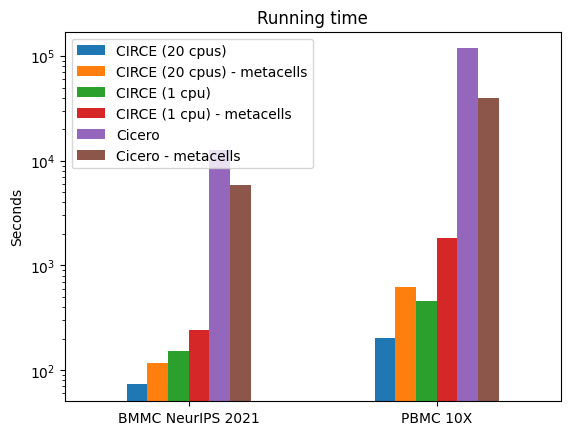

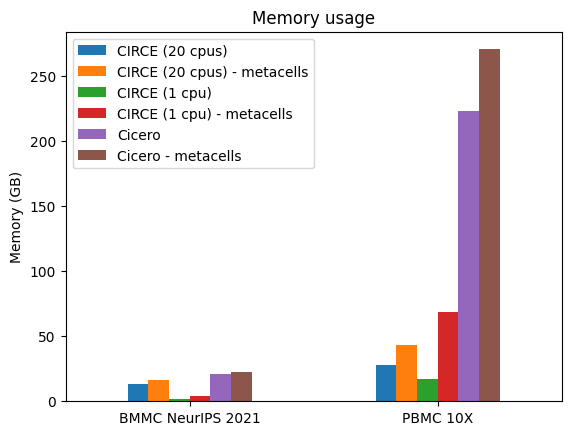

In [11]:
# one figure per level 0 index value
for param in ["s", "max_rss"]:
    if param != "max_rss":
        bench.loc[param].plot.bar()
        plt.yscale('log')
        plt.ylabel("Seconds")
        plt.title("Running time")
    else:
        (bench.loc[param]/1000).plot.bar()
        plt.ylabel("Memory (GB)")
        plt.title("Memory usage")

    # change tick labels
    plt.xticks(
        range(2),
        ["BMMC NeurIPS 2021", "PBMC 10X"])
    # rotate xlabels
    plt.xticks(rotation=0)
    plt.savefig("results/figures/benchmark_{}.svg".format(param))


In [12]:
# access multiindex columns
time_df = bench.loc["s", :]
circe_average_time = time_df.loc[:, time_df.columns.str.contains("20")].mean().mean()
cicero_average_time = time_df.loc[:, time_df.columns.str.contains("Cicero")].mean().mean()
print("Average improvement in speed: {}".format(cicero_average_time/circe_average_time))

Average improvement in speed: 173.12889728991863


In [13]:
print("Max improvement in speed: {}".format(time_df.loc['pbmc10x', 'Cicero']/time_df.loc['pbmc10x', 'CIRCE (20 cpus)']))
print("Min improvement in speed: {}".format(time_df.loc['bmmcneurips', 'Cicero - metacells']/time_df.loc['bmmcneurips', 'CIRCE (20 cpus) - metacells']))

Max improvement in speed: 581.9140545707018
Min improvement in speed: 50.25937273171577


In [14]:
# access multiindex columns
time_df = bench.loc["max_rss", :]
circe_average_time = time_df.loc[:, time_df.columns.str.contains("20")].mean().mean()
cicero_average_time = time_df.loc[:, time_df.columns.str.contains("Cicero")].mean().mean()
print("Average improvement in memory usage: {}".format(cicero_average_time/circe_average_time))

Average improvement in memory usage: 5.351261801129759


In [15]:
print("Max improvement in memory usage: {}".format(time_df.loc['pbmc10x', 'Cicero']/time_df.loc['pbmc10x', 'CIRCE (1 cpu)']))
print("Min improvement in memory usage: {}".format(time_df.loc['bmmcneurips', 'Cicero - metacells']/time_df.loc['bmmcneurips', 'CIRCE (1 cpu) - metacells']))

Max improvement in memory usage: 13.188463948360857
Min improvement in memory usage: 5.8011961976340025


### Supplementary Figure: Correlation between network inferred from raw count and after Cicero's normalization

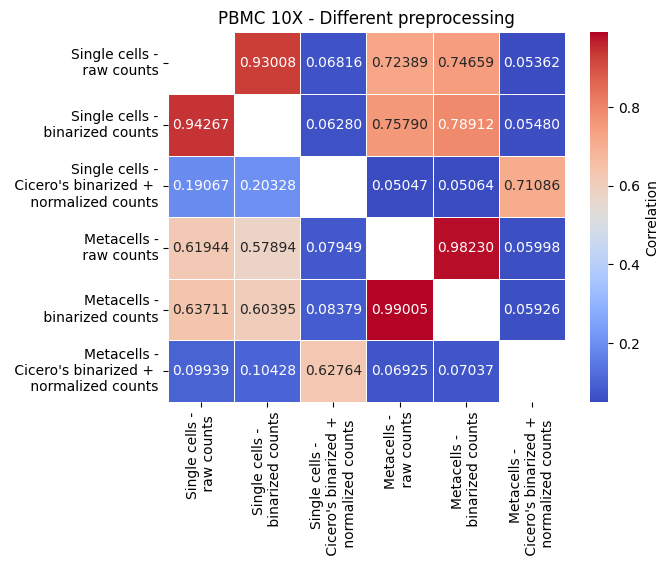

In [16]:
import pandas as pd

keys = ["circe_singlecell", "circe_bin_singlecell", "circe_singlecell_from_cicero",
        "circe_pseudocell", "circe_bin_pseudocell", "circe_pseudocell_from_cicero"]
paths = [
    "results/pbmc10x/circe/circe_singlecell.tsv",
    "results/pbmc10x/circe/circe_bin_singlecell.tsv",
    "results/pbmc10x/circe/circe_singlecell_from_cicero.tsv",
    "results/pbmc10x/circe/circe_pseudocell.tsv",
    "results/pbmc10x/circe/circe_bin_pseudocell.tsv",
    "results/pbmc10x/circe/circe_pseudocell_from_cicero.tsv"
]

l_df = [pd.read_csv(path, sep="\t") for path in paths]

for i in range(len(l_df)):
    l_df[i] = l_df[i][l_df[i]["coaccess"]!=0]
    l_df[i]["Peak1"] = l_df[i]["Peak1"].str.replace("_", "-")
    l_df[i]["Peak2"] = l_df[i]["Peak2"].str.replace("_", "-")
    l_df[i] = l_df[i].rename(columns={"coaccess": keys[i]},).set_index(["Peak1", "Peak2"])

df_all = pd.concat(l_df, axis=1)
corr_preprocessing_pbmc10x_spearman = df_all.corr(method="spearman")
corr_preprocessing_pbmc10x_pearson = df_all.corr(method="pearson")

corr_preprocessing_pbmc10x_spearman = corr_preprocessing_pbmc10x_spearman.where(np.triu(np.ones(corr_preprocessing_pbmc10x_spearman.shape).astype(bool)))
corr_preprocessing_pbmc10x_pearson = corr_preprocessing_pbmc10x_pearson.where(np.tril(np.ones(corr_preprocessing_pbmc10x_pearson.shape).astype(bool)))
corr_preprocessing_pbmc10x = corr_preprocessing_pbmc10x_pearson.fillna(corr_preprocessing_pbmc10x_spearman)

corr_preprocessing_pbmc10x.rename(
    index={
        "circe_singlecell": "Single cells -\n raw counts",
        "circe_bin_singlecell": "Single cells -\n binarized counts",
        "circe_singlecell_from_cicero": "Single cells -\n Cicero's binarized + \n normalized counts",
        "circe_pseudocell": "Metacells -\n raw counts",
        "circe_bin_pseudocell": "Metacells -\n binarized counts",
        "circe_pseudocell_from_cicero": "Metacells -\n Cicero's binarized + \n normalized counts",
        },
    columns={
        "circe_singlecell": "Single cells -\n raw counts",
        "circe_bin_singlecell": "Single cells -\n binarized counts",
        "circe_singlecell_from_cicero": "Single cells -\n Cicero's binarized + \n normalized counts",
        "circe_pseudocell": "Metacells -\n raw counts",
        "circe_bin_pseudocell": "Metacells -\n binarized counts",
        "circe_pseudocell_from_cicero": "Metacells -\n Cicero's binarized + \n normalized counts",
        }, inplace=True)

# Plot heatmap with ranks as colors but original values as annotations
sb.heatmap(
    corr_preprocessing_pbmc10x,  # Use ranked values for color mapping
    annot=corr_preprocessing_pbmc10x,  # Annotate with the original values
    mask=np.eye(corr_preprocessing_pbmc10x.shape[0]),  # Mask the diagonal
    fmt=".5f",  # Format for annotations
    cmap="coolwarm",  # Colormap
    cbar_kws={'label': 'Correlation'},  # Label for the color bar
    linewidths=0.5  # Grid lines
)

# Rotate the tick labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title("PBMC 10X - Different preprocessing")
plt.savefig("results/figures/correlation_heatmap_preprocessing_pbmc10x.svg", bbox_inches="tight")


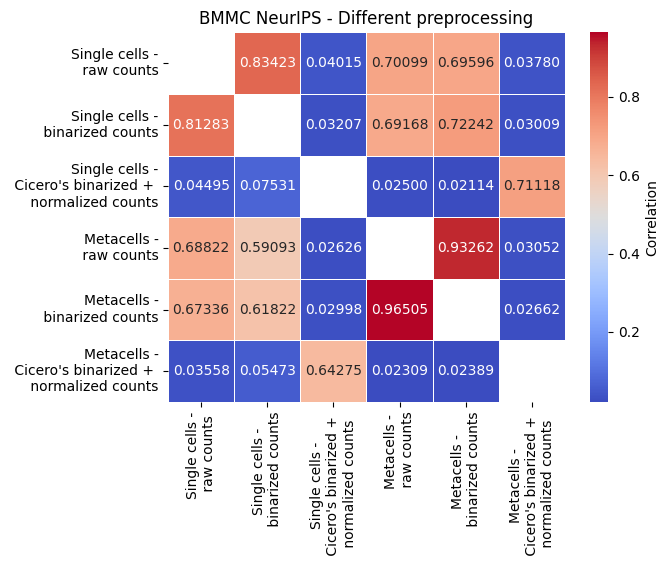

In [17]:
import pandas as pd
import numpy as np

keys = ["circe_singlecell", "circe_bin_singlecell", "circe_singlecell_from_cicero",
        "circe_pseudocell", "circe_bin_pseudocell", "circe_pseudocell_from_cicero"]
paths = [
    "results/bmmcneurips/circe/circe_singlecell.tsv",
    "results/bmmcneurips/circe/circe_bin_singlecell.tsv",
    "results/bmmcneurips/circe/circe_singlecell_from_cicero.tsv",
    "results/bmmcneurips/circe/circe_pseudocell.tsv",
    "results/bmmcneurips/circe/circe_bin_pseudocell.tsv",
    "results/bmmcneurips/circe/circe_pseudocell_from_cicero.tsv"
]

l_df = [pd.read_csv(path, sep="\t") for path in paths]

for i in range(len(l_df)):
    l_df[i] = l_df[i][l_df[i]["coaccess"]!=0]
    l_df[i]["Peak1"] = l_df[i]["Peak1"].str.replace("_", "-")
    l_df[i]["Peak2"] = l_df[i]["Peak2"].str.replace("_", "-")
    l_df[i] = l_df[i].rename(columns={"coaccess": keys[i]},).set_index(["Peak1", "Peak2"])

df_all = pd.concat(l_df, axis=1)
corr_preprocessing_bmmcneurips_spearman = df_all.corr(method="spearman")
corr_preprocessing_bmmcneurips_pearson = df_all.corr(method="pearson")

corr_preprocessing_bmmcneurips_spearman = corr_preprocessing_bmmcneurips_spearman.where(np.triu(np.ones(corr_preprocessing_bmmcneurips_spearman.shape).astype(bool)))
corr_preprocessing_bmmcneurips_pearson = corr_preprocessing_bmmcneurips_pearson.where(np.tril(np.ones(corr_preprocessing_bmmcneurips_pearson.shape).astype(bool)))
corr_preprocessing_bmmcneurips = corr_preprocessing_bmmcneurips_pearson.fillna(corr_preprocessing_bmmcneurips_spearman)

corr_preprocessing_bmmcneurips.rename(
    index={
        "circe_singlecell": "Single cells -\n raw counts",
        "circe_bin_singlecell": "Single cells -\n binarized counts",
        "circe_singlecell_from_cicero": "Single cells -\n Cicero's binarized + \n normalized counts",
        "circe_pseudocell": "Metacells -\n raw counts",
        "circe_bin_pseudocell": "Metacells -\n binarized counts",
        "circe_pseudocell_from_cicero": "Metacells -\n Cicero's binarized + \n normalized counts",
        },
    columns={
        "circe_singlecell": "Single cells -\n raw counts",
        "circe_bin_singlecell": "Single cells -\n binarized counts",
        "circe_singlecell_from_cicero": "Single cells -\n Cicero's binarized + \n normalized counts",
        "circe_pseudocell": "Metacells -\n raw counts",
        "circe_bin_pseudocell": "Metacells -\n binarized counts",
        "circe_pseudocell_from_cicero": "Metacells -\n Cicero's binarized + \n normalized counts",
        }, inplace=True)

# Plot heatmap with ranks as colors but original values as annotations
sb.heatmap(
    corr_preprocessing_bmmcneurips,  # Use ranked values for color mapping
    annot=corr_preprocessing_bmmcneurips,  # Annotate with the original values
    mask=np.eye(corr_preprocessing_bmmcneurips.shape[0]),  # Mask the diagonal
    fmt=".5f",  # Format for annotations
    cmap="coolwarm",  # Colormap
    cbar_kws={'label': 'Correlation'},  # Label for the color bar
    linewidths=0.5  # Grid lines
)

# Rotate the tick labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title("BMMC NeurIPS - Different preprocessing")
plt.savefig("results/figures/correlation_heatmap_preprocessing_bmmcneurips.svg", bbox_inches="tight")